In [ ]:
!pip install tensorflowjs

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
def generar_dataset_temperaturas(n, min_temp=-20, max_temp=50, filename='temperatures.csv'):
    """
    Genera un DataFrame con 'n' temperaturas en grados Celsius y su conversión a Fahrenheit y lo guarda en un archivo CSV.
    
    Parámetros:
        n (int): Número de temperaturas a generar.
        min_temp (int): Temperatura mínima en grados Celsius (por defecto -20).
        max_temp (int): Temperatura máxima en grados Celsius (por defecto 50).
        filename (str): Nombre del archivo CSV donde se guardarán los datos (por defecto 'temperatures.csv').
        
    Retorna:
        pd.DataFrame: Un DataFrame con dos columnas, 'Celsius' y 'Fahrenheit', guardado en un archivo CSV.
    """
    # Generar n temperaturas aleatorias en el rango especificado
    temperaturas_celsius = np.random.randint(min_temp, max_temp + 1, size=n)
    
    # Calcular las temperaturas equivalentes en Fahrenheit
    temperaturas_fahrenheit = (temperaturas_celsius * 9/5) + 32
    
    # Crear un DataFrame con las temperaturas
    df = pd.DataFrame({
        'Celsius': temperaturas_celsius,
        'Fahrenheit': temperaturas_fahrenheit
    })
    
    # Guardar el DataFrame en un archivo CSV
    df.to_csv(filename, index=False)
    
    return df

# Ejemplo de uso de la función
dataset = generar_dataset_temperaturas(1500)


Comenzando entrenamiento...

Modelo entrenado!


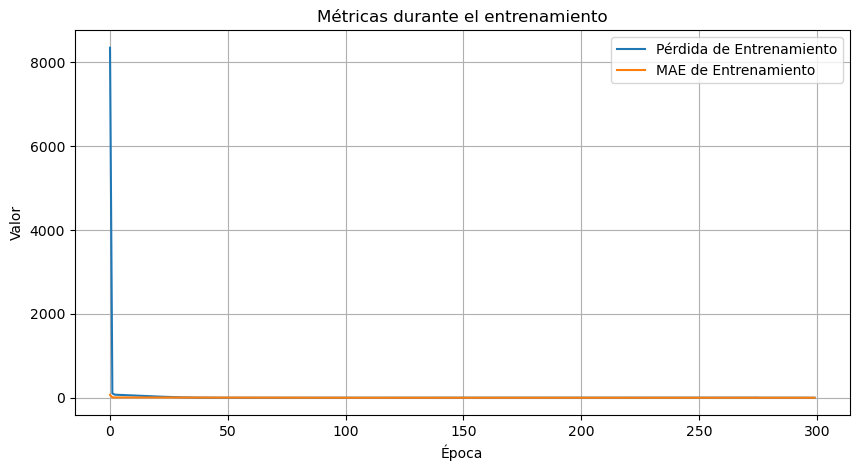

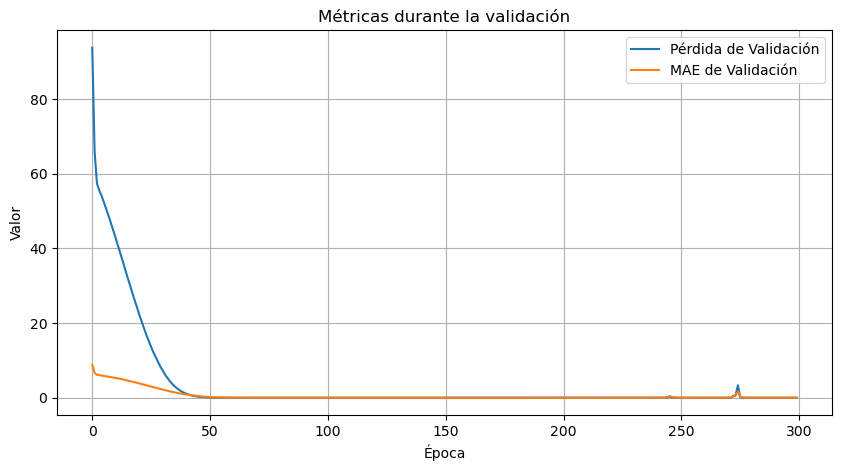

In [3]:
# Carga de datos
grados = pd.read_csv('temperatures.csv')
celsius = grados['Celsius'].values.reshape(-1, 1)  # Convertimos en un array 2D para sklearn
fahrenheit = grados['Fahrenheit'].values

# División en entrenamiento y prueba
celsius_train, celsius_test, fahrenheit_train, fahrenheit_test = train_test_split(
    celsius, fahrenheit, test_size=0.20, random_state=42
)

# División de los datos de entrenamiento en entrenamiento y validación
celsius_train, celsius_val, fahrenheit_train, fahrenheit_val = train_test_split(
    celsius_train, fahrenheit_train, test_size=0.05, random_state=42
)

# Definición de modelo
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

# Compilación de modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

# Entrenamiento de modelo
print("Comenzando entrenamiento...")
historial = modelo.fit(
    fahrenheit_train, celsius_train, 
    epochs=300, 
    verbose=False, 
    validation_data=(fahrenheit_val, celsius_val)
)
print("Modelo entrenado!")

# Gráfico para Entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(historial.history['mean_absolute_error'], label='MAE de Entrenamiento')
plt.title('Métricas durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para Validación
plt.figure(figsize=(10, 5))
plt.plot(historial.history['val_loss'], label='Pérdida de Validación')
plt.plot(historial.history['val_mean_absolute_error'], label='MAE de Validación')
plt.title('Métricas durante la validación')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
resultado = modelo.predict([0])
print("Prediccion: 100 grados fahrenheit son " + str(resultado) + " celsius!")

1/1 [==============================] - 0s 34ms/step
Prediccion: 100 grados fahrenheit son [[-17.777779]] celsius!


In [7]:
modelo.save('fahrenheit_a_celsius.h5')

c:\Users\Aaron\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Este código en local con Anaconda no funciona, se ha realizado en Collab llevando el modelo entrenado y se han descargado luego los archivos que se generan en el output

In [ ]:
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 output